# Comparisons of differet optimizeers for QAOA (Exact Cover)
In this notebook different optimizers for the QAOA parameters are compared, for the exact cover problem. Both the values of the parameters and the resulting approximation ratio are compared.
# Importing necessary modules

In [17]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAExactCover import QAOAExactCover
from utilities_exactCover import computeOptimalSolution, computeAverageApproxRatio
from tailassignment_loader import *
from utilities_exactCover import computeOptimalSolution, computeAverageApproxRatio
from qiskit import *
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *
from qiskit_algorithms.optimizers import SPSA, QNSPSA, COBYLA, NELDER_MEAD

# Creating problem instance

In [18]:
size = 11
flights   = 16
solutions = 4

path_to_examples = "tailassignment_samples/"

FR, CR, best_sol = load_FR_CR(path_to_examples + f'FRCR_{size}_{flights}_{solutions}.txt')

# Setting up the optimizers to use roughly the same number of function evaluations

In [19]:
optimizers={}
plotstyle={}

settings = {
    "maxiter": 70,
    "blocking": True,
    "allowed_increase": 0,
    "second_order": True,
    "regularization": 0.01
}
optimizers["spsa"] = [SPSA, settings.copy()]
plotstyle["spsa"] = '+-'

settings = {
    "maxiter": 50,
    "blocking": True,
    "allowed_increase": 0,
    "learning_rate": 0.02,
    "perturbation": 0.05,
    "regularization": 0.01,
    "hessian_delay": 0
}
optimizers["qnspsa"] = [QNSPSA, settings.copy()]
plotstyle["qnspsa"] = 'o-'

settings = {
    "maxiter": 110,
    "tol": 1e-6 
}
optimizers["neldermead"] = [NELDER_MEAD, settings.copy()]
plotstyle["neldermead"] = 'x-'

settings = {
    "maxiter": 350,
    "tol": 1e-6 
}
optimizers["cobyla"] = [COBYLA, settings.copy()]
plotstyle["cobyla"] = '*-'

# Creating a QAOA instance for each optimizer

In [20]:
params={'FR': FR}
params['CR']= CR
params['instances'] = size
qaoa={}
for key in optimizers:
    params[key] = optimizers
    qaoa[key]=QAOAExactCover(params=params)

# Sample the cost landscape for each QAOA instance

In [21]:
for key in optimizers:
    qaoa[key].sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})

Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


# Plot cost landscape for one optimizer method

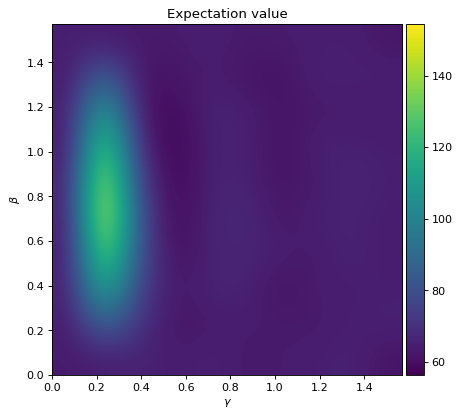

In [22]:
method = "cobyla"

f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoa[method].E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

# Increasing depth for each QAOA instance

In [23]:
maxdepth=10
for i in range(maxdepth):
    for key in optimizers:
        qaoa[key].increase_depth()

cost(depth= 1 )= 55.95898437500001
cost(depth= 1 )= 55.62402343749999
cost(depth= 1 )= 23.16113281249999
cost(depth= 1 )= 55.76953125000001
cost(depth= 2 )= 63.10058593749998
cost(depth= 2 )= 62.99414062500003
cost(depth= 2 )= 17.518554687499993
cost(depth= 2 )= 62.597656249999936
cost(depth= 3 )= 62.41503906250002
cost(depth= 3 )= 51.66601562499997
cost(depth= 3 )= 15.821289062499998
cost(depth= 3 )= 62.42480468750002
cost(depth= 4 )= 61.60058593749998
cost(depth= 4 )= 62.431640625
cost(depth= 4 )= 16.552734374999996
cost(depth= 4 )= 61.96582031249998
cost(depth= 5 )= 63.63476562500003
cost(depth= 5 )= 65.9521484375001
cost(depth= 5 )= 15.626953124999998
cost(depth= 5 )= 59.91308593749997
cost(depth= 6 )= 49.910156250000014
cost(depth= 6 )= 64.54394531249993
cost(depth= 6 )= 15.691406250000004
cost(depth= 6 )= 61.14257812500004
cost(depth= 7 )= 64.78710937500004
cost(depth= 7 )= 64.36132812499999
cost(depth= 7 )= 15.142578125000007
cost(depth= 7 )= 62.29882812500008
cost(depth= 8 )= 6

# Compute and print the optimal solution

In [24]:
#These functions are the same for all the different optimizers
method = "cobyla"
cost_func = qaoa[key].cost
isFeasible_func = qaoa[method].isFeasible

mincost, solution = computeOptimalSolution(cost_func, isFeasible_func, FR)
print("Optimal solution: ", solution, "\n With cost: ", mincost)


Optimal solution:  10010100000 
 With cost:  8.0


# Compute and plot approximation ratio

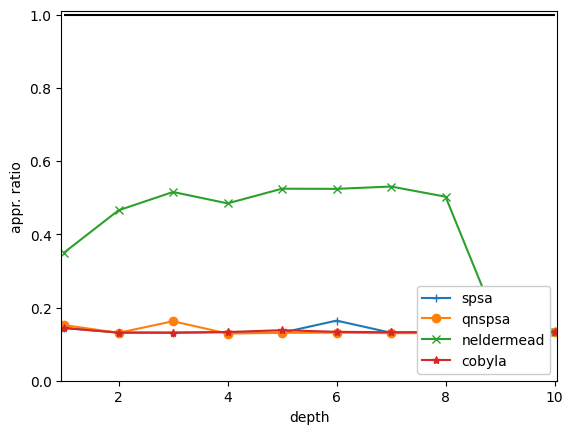

In [25]:
ax = pl.figure().gca()
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
for key in optimizers:
    pl.plot(np.arange(1,maxdepth+1), mincost/np.array(list(qaoa[key].costval.values())), plotstyle[key], label=key)
pl.ylim(0,1.01)
pl.xlim(1-0.05,maxdepth+0.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')
_=pl.legend(loc="lower right", framealpha=1)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Compute and plot the approximation ratio (SECOND WAY)

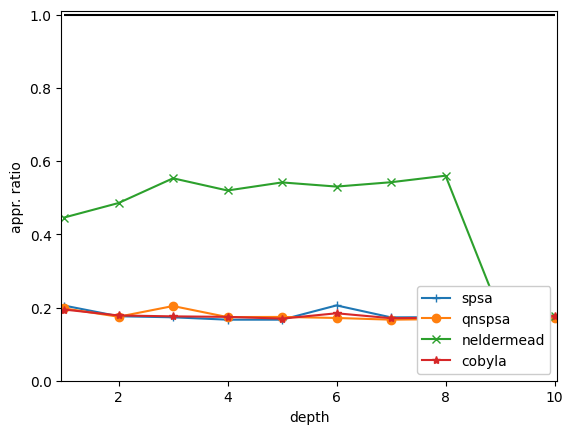

In [26]:
hists = {}

for key in optimizers:
    hists[key] = [qaoa[key].hist(qaoa[key].angles_hist['d' + str(1)+'_final'])]
    for i in range(1, maxdepth):
        hists[key].append(qaoa[key].hist(qaoa[key].angles_hist['d'+str(i+1)+'_final']))

apprx_ratio = {} #List of approx ratios for different depths at each key in this dictionary

for key in optimizers:
    apprx_ratio[key] = [computeAverageApproxRatio(hists[key][0], mincost, cost_func)]
    for i in range(1, maxdepth):
        apprx_ratio[key].append(computeAverageApproxRatio(hists[key][i], mincost, cost_func))

pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
for key in optimizers:
    pl.plot(np.arange(1, maxdepth+1), apprx_ratio[key], plotstyle[key], label = key)

pl.ylim(0,1.01)
pl.xlim(1-.05,maxdepth+.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')
_=pl.legend(loc="lower right", framealpha=1)

# Plotting the values for the parameters found by the different optimizers

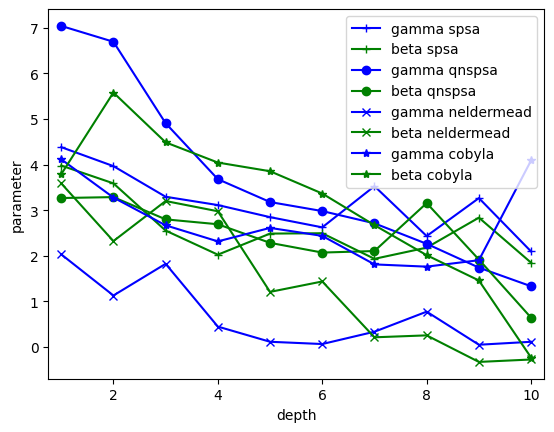

In [27]:
ax = pl.figure().gca()
for key in optimizers:
    pl.plot(np.arange(1,maxdepth+1),qaoa[key].angles_hist['d'+str(maxdepth)+'_final'][::2],"b"+plotstyle[key],label='gamma '+key)
    pl.plot(np.arange(1,maxdepth+1),qaoa[key].angles_hist['d'+str(maxdepth)+'_final'][1::2],"g"+plotstyle[key],label='beta '+key)
pl.xlim(1-.25,maxdepth+.25)
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()
#ax.xaxis.set_major_loc

# Plotting the number of function evaluations used by each optimizer 

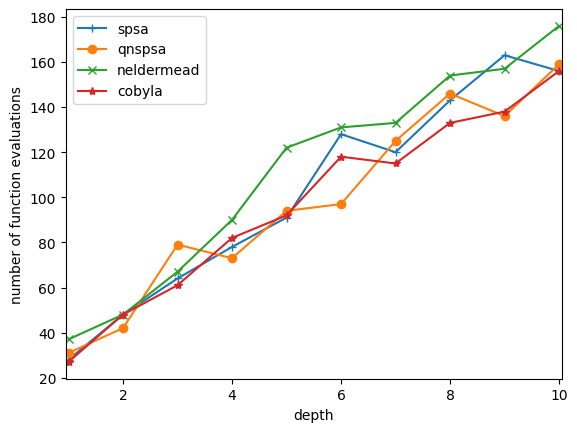

In [28]:
ax = pl.figure().gca()
for key in optimizers:
    _=pl.plot(np.arange(1,maxdepth+1),qaoa[key].num_fval.values(), plotstyle[key], label=key)
pl.xlim(1-.05,maxdepth+.05)
_=pl.ylabel('number of function evaluations')
_=pl.xlabel('depth')
_=pl.legend()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Should a test be done with CVaR and different optimizers?